#Preparation | Persiapan

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
%matplotlib inline

from time import sleep

# visualization
from IPython.display import display, clear_output
import matplotlib as mpl
import matplotlib.animation
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.style as style
from matplotlib import lines
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import seaborn as sns

# modeling
from sklearn.cluster import estimate_bandwidth
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift

# getting data
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons

In [51]:
df = pd.read_csv("/content/nutrition.csv")
df

,id,calories,proteins,fat,carbohydrate,name,image
0,1,280.0,9.2,28.4,0.0,Abon,https://img-cdn.medkomtek.com/PbrY9X3ignQ8sVuj...
1,2,513.0,23.7,37.0,21.3,Abon haruwan,https://img-global.cpcdn.com/recipes/cbf330fbd...
2,3,0.0,0.0,0.2,0.0,Agar-agar,https://res.cloudinary.com/dk0z4ums3/image/upl...
3,4,45.0,1.1,0.4,10.8,Akar tonjong segar,https://images.tokopedia.net/img/cache/200-squ...
4,5,37.0,4.4,0.5,3.8,Aletoge segar,https://nilaigizi.com/assets/images/produk/pro...
...,...,...,...,...,...,...,...
1341,1342,42.0,1.2,0.6,9.3,Wortel Segar,https://www.astronauts.id/blog/wp-content/uplo...
1342,1343,37.0,1.0,0.6,8.3,Wortel kukus,https://www.wikihow.com/images_en/thumb/b/bf/S...
1343,1344,28.0,0.7,0.5,6.3,Wortel rebus,https://asset-a.grid.id/crop/0x222:594x690/700...
1344,1345,254.0,3.0,1.1,58.1,Yangko,https://serikatnews.com/wp-content/uploads/202...


In [52]:
df.shape

(1346, 7)

In [53]:
# Generate 10 features even though we generally only chart 3 (these are nice multidemensional, spherical clusters)
n_features = 10
n_samples = 1000
random_state = 100

# blobs is our generated data set.  blob_labels is the expected blob cluster membership.
blobs, blob_labels = make_blobs(n_samples=n_samples, n_features=n_features, random_state=random_state)

# Put the data set in a DataFrame and give it some columns names.
blobs_df = pd.DataFrame(blobs, columns=['X', 'Y', 'Z', 'A', 'B', 'C', 'D', 'E', 'F', 'G'])
blobs_df['CLUSTER'] = blob_labels

# 2-dimensional moons dataset to show where some algorithms excel.
moons, moon_labels = make_moons(n_samples=n_samples, noise=.05)

# Save the CHURNRISK label column for later.
known_risk = df['id']

# Combine gains - losses into a profit column,
# and select a some of the numeric trader data to use for our customer clustering example.
keep_columns = ['id', 'calories', 'proteins', 'fat', 'carbohydrate', 'name']

df_id = df.assign(gatau=df.apply(lambda row: row.calories - row.fat, axis=1).values)[keep_columns]


# Pick 3 features to use later in 3D charts
x_name = 'calories'
y_name = 'proteins'
z_name = 'fat'

df_id.head()

,id,calories,proteins,fat,carbohydrate,name
0,1,280.0,9.2,28.4,0.0,Abon
1,2,513.0,23.7,37.0,21.3,Abon haruwan
2,3,0.0,0.0,0.2,0.0,Agar-agar
3,4,45.0,1.1,0.4,10.8,Akar tonjong segar
4,5,37.0,4.4,0.5,3.8,Aletoge segar


In [54]:
df = df.drop(columns = 'image')
df

,id,calories,proteins,fat,carbohydrate,name
0,1,280.0,9.2,28.4,0.0,Abon
1,2,513.0,23.7,37.0,21.3,Abon haruwan
2,3,0.0,0.0,0.2,0.0,Agar-agar
3,4,45.0,1.1,0.4,10.8,Akar tonjong segar
4,5,37.0,4.4,0.5,3.8,Aletoge segar
...,...,...,...,...,...,...
1341,1342,42.0,1.2,0.6,9.3,Wortel Segar
1342,1343,37.0,1.0,0.6,8.3,Wortel kukus
1343,1344,28.0,0.7,0.5,6.3,Wortel rebus
1344,1345,254.0,3.0,1.1,58.1,Yangko


In [55]:
df.columns

Index(['id', 'calories', 'proteins', 'fat', 'carbohydrate', 'name'], dtype='object')

## Data Cleaning

In [56]:
df.isnull().sum()

id              0
calories        0
proteins        0
fat             0
carbohydrate    0
name            0
dtype: int64

No Null values present

In [57]:
df.duplicated().sum()

0

No Duplicate entries in the data

In [58]:
df.dtypes

id                int64
calories        float64
proteins        float64
fat             float64
carbohydrate    float64
name             object
dtype: object

## EDA

In [59]:
df.describe()

,id,calories,proteins,fat,carbohydrate
count,1346.000000,1346.000000,1346.000000,1346.000000,1346.000000
mean,673.500000,203.217385,10.001189,7.584027,25.390193
std,388.701042,163.075430,11.847980,13.733063,32.193054
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,337.250000,75.000000,1.800000,0.500000,4.525000
50%,673.500000,146.000000,5.000000,2.000000,13.300000
75%,1009.750000,333.750000,15.000000,8.275000,37.575000
max,1346.000000,940.000000,83.000000,100.000000,647.000000


In [60]:
df.describe(include = 'O')

,name
count,1346
unique,1346
top,Abon
freq,1


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1346 entries, 0 to 1345
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            1346 non-null   int64  
 1   calories      1346 non-null   float64
 2   proteins      1346 non-null   float64
 3   fat           1346 non-null   float64
 4   carbohydrate  1346 non-null   float64
 5   name          1346 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 63.2+ KB


In [62]:
# Display the first five rows
df.head(5)

,id,calories,proteins,fat,carbohydrate,name
0,1,280.0,9.2,28.4,0.0,Abon
1,2,513.0,23.7,37.0,21.3,Abon haruwan
2,3,0.0,0.0,0.2,0.0,Agar-agar
3,4,45.0,1.1,0.4,10.8,Akar tonjong segar
4,5,37.0,4.4,0.5,3.8,Aletoge segar


In [63]:
# Display the last 10 rows
df.tail(10)

,id,calories,proteins,fat,carbohydrate,name
1336,1337,424.0,1.3,10.7,80.7,Widaran
1337,1338,568.0,19.3,51.1,18.1,Wijen
1338,1339,355.0,3.2,15.1,51.4,Wingko babat
1339,1340,143.0,3.1,7.8,15.0,Woku ubi
1340,1341,452.0,14.5,42.3,2.3,Worst (sosis daging)
1341,1342,42.0,1.2,0.6,9.3,Wortel Segar
1342,1343,37.0,1.0,0.6,8.3,Wortel kukus
1343,1344,28.0,0.7,0.5,6.3,Wortel rebus
1344,1345,254.0,3.0,1.1,58.1,Yangko
1345,1346,52.0,3.3,2.5,4.0,Yoghurt


In [64]:
sns.set(style='darkgrid')
plt.rcParams['figure.figsize'] = [8, 3]

In [65]:
# 3D matplotlib (plus seaborn) charting with some data prep and optional center points
def show_scatter_3d(df, x_name, y_name, z_name, predicted=None, centers=None,
                    marker='o', cmap=None, edgecolors=None, alpha=0.3,
                    elev=25, azim=10, show_colorbar=True,
                    xlim3d=None, ylim3d=None, zlim3d=None):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    x_index = df.columns.get_loc(x_name)
    y_index = df.columns.get_loc(y_name)
    z_index = df.columns.get_loc(z_name)

    x = df[x_name]
    y = df[y_name]
    z = df[z_name]

    if centers is not None:
        spot_size=15  # Smaller spots make X more visible
        for center in centers:
            if center is not None:
                ax.scatter(center[x_index], center[y_index], center[z_index], marker="X", s=500, color='red')
    else:
        spot_size=30

    # Pass in cmap if necessary, else get a right-sized list here
    if not cmap:
        cmap = ListedColormap(sns.color_palette("Set2",len(set(predicted))))

    chart = ax.scatter(x, y, z, c=predicted, marker=marker, edgecolors=edgecolors, cmap=cmap, s=spot_size, alpha=alpha)

    # Add axis labels
    ax.set_xlabel(x_name)
    ax.set_ylabel(y_name)
    ax.set_zlabel(z_name)

    # Optionally, set the axis limits:
    if xlim3d:
        ax.set_xlim3d(xlim3d)
    if ylim3d:
        ax.set_ylim3d(ylim3d)
    if zlim3d:
        ax.set_zlim3d(zlim3d)

    # Make room for axis titles
    plt.subplots_adjust(bottom=1, top=3, left=0, right=2)

    # Chart rotation
    ax.view_init(elev, azim)

    if show_colorbar:
        fig.colorbar(chart, ticks=list(set(predicted)))

    return fig, ax

In [66]:
RdYlBu = plt.get_cmap('RdYlBu')  # colormap for moons

def show_scatter_moons(data, prediction, centers=[]):
    plt.scatter(data[:, 0], data[:, 1], c=prediction, cmap=RdYlBu, alpha=0.5);
    for center in centers:
        plt.scatter(center[0], center[1], marker="X", s=300, color='red')

In [67]:
# Plotly 3D scatter chart is almost a one-liner, but use this function to keep the params in one place
def plotly_scatter_3d(df, x, y, z, color=None):
    fig = px.scatter_3d(df, x=x, y=y, z=z, color=color,
                        opacity=0.2, template='plotly_dark',
                        color_continuous_scale=px.colors.qualitative.Set1)
    fig.show()

In [68]:
# Use a stacked bar chart for an external evaluation of the churn cluster vs known churn risk

# Map the risk values to sortables (and still OK for the legend)
risk_map = {'High': '2: High', 'Medium': '1: Medium', 'Low': '0: Low'}

# Reusable chart to see if our clusters might help with churn risk prediction
def show_risk_by_cluster(data, risk):

    # Create DataFrame with predicted CLUSTER ID
    data_df = pd.DataFrame(data=data, columns=['CLUSTER'])

    # Add CHURN_RISK using sortable values
    data_df['id'] = risk.map(risk_map)

    # Group by and count to get count of Hi/Med/Low in each cluster
    grouped_data = data_df.groupby(['CLUSTER', 'id']).size().to_frame().reset_index()

    # Pivot for charting
    pivot = grouped_data.pivot(index='CLUSTER', columns='id', values=0).fillna(0)

    # Sort to show descending High and then ascending Low counts
    pivot = pivot.reindex(pivot.sort_values(by=['2: High', '0: Low'], ascending=[False, True]).index)

    # Plot the sorted stacked bar chart
    pivot.plot(kind='bar', stacked=True, color='gbr')

    # Put the legend on the side
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## Visualize Data | Visualisasi Data

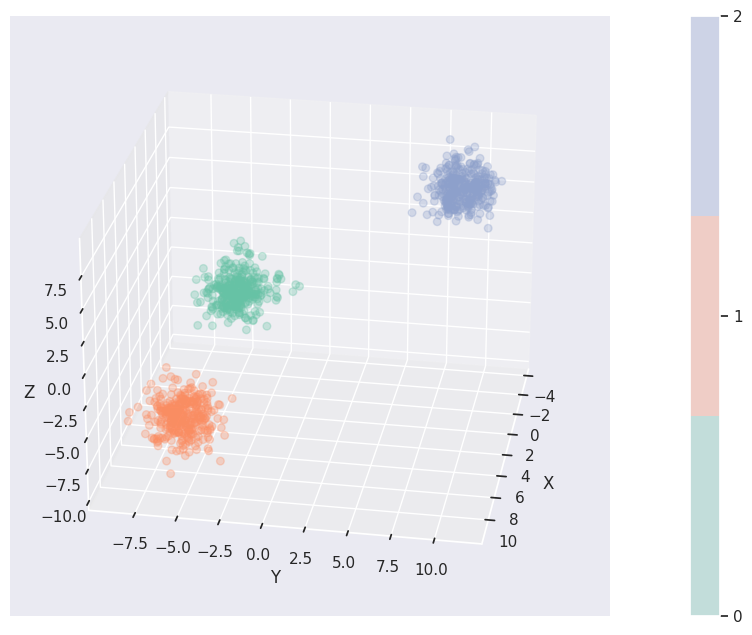

In [69]:
show_scatter_3d(blobs_df, 'X', 'Y', 'Z', predicted=blob_labels);

Kode ini memanggil sebuah fungsi bernama show_scatter_3d dengan parameter:

blobs_df: DataFrame yang berisi data yang akan diplot.
'X', 'Y', 'Z': Nama kolom dalam DataFrame yang digunakan untuk sumbu X, Y, dan Z.
predicted=blob_labels: Label prediksi klaster untuk setiap titik data.
Fungsi ini digunakan untuk menampilkan scatter plot 3D dari data yang diberikan, dengan titik-titik yang diwarnai berdasarkan label klaster yang diberikan.

In [70]:
plotly_scatter_3d(blobs_df, 'X', 'Y', 'Z', color='CLUSTER')

Fungsi plotly_scatter_3d memungkinkan Anda untuk dengan mudah membuat scatter plot 3D yang interaktif menggunakan Plotly. Parameter color memungkinkan pewarnaan titik berdasarkan label klaster atau kategori lainnya dalam data Anda. Ini sangat berguna untuk visualisasi hasil clustering atau analisis data lainnya yang memerlukan representasi dalam ruang 3D. Plot yang dihasilkan bersifat interaktif, sehingga Anda dapat memutar, memperbesar, dan menjelajahi data secara visual dengan lebih mendalam.







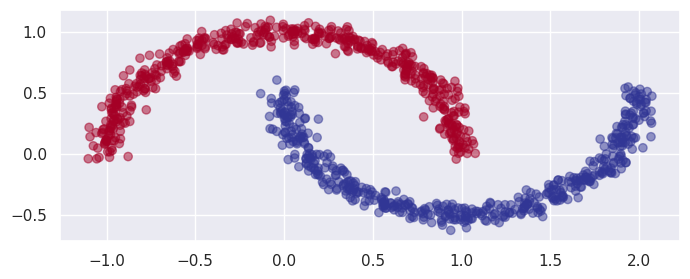

In [71]:
show_scatter_moons(moons, moon_labels)

Fungsi show_scatter_moons(moons, moon_labels) secara efektif mengambil data koordinat 2D dan labelnya, menggabungkannya ke dalam DataFrame, dan kemudian menggunakan Plotly untuk membuat scatter plot yang menunjukkan distribusi titik-titik tersebut dengan pewarnaan berdasarkan label. Fungsi ini sangat berguna untuk visualisasi data dan analisis eksploratif dalam machine learning.

# Model Training | Pelatihan Model


##K-Means

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



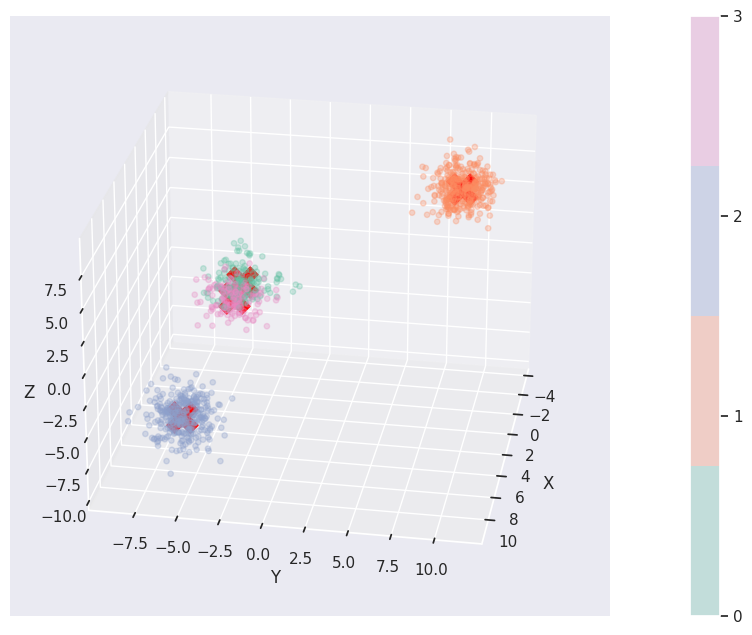

In [72]:
k = 4
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(blobs)
centers = kmeans.cluster_centers_

show_scatter_3d(blobs_df, 'X', 'Y', 'Z', predicted=y_pred, centers=centers);

Kode ini melakukan clustering data tiga dimensi menggunakan algoritma K-Means, kemudian memvisualisasikan hasilnya dalam scatter plot 3D. Dengan menggunakan kode ini, kita dapat dengan mudah melakukan clustering data tiga dimensi menggunakan algoritma K-Means dan memvisualisasikan hasilnya dalam scatter plot 3D. Hal ini memungkinkan kita untuk memahami struktur dan pola data dengan lebih baik dalam ruang tiga dimensi.






/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



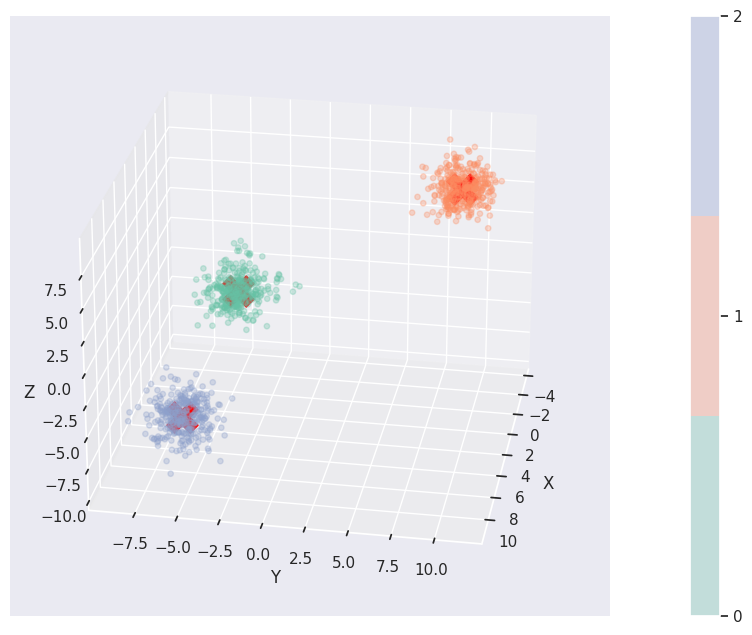

In [73]:
k = 3
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(blobs)
centers = kmeans.cluster_centers_

show_scatter_3d(blobs_df, 'X', 'Y', 'Z', predicted=y_pred, centers=centers);

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



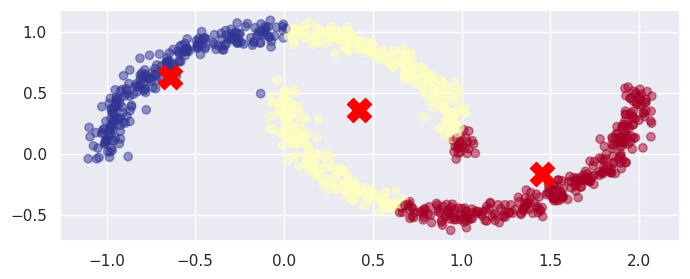

In [74]:
k = 3
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(moons)
centers = kmeans.cluster_centers_

show_scatter_moons(moons, y_pred, centers)

Kode ini bertujuan untuk melakukan clustering data dengan menggunakan algoritma K-Means dengan 3 kluster pada dataset moons, kemudian memvisualisasikan hasilnya dalam scatter plot. Dengan menggunakan kode ini, kita dapat dengan mudah melakukan clustering data dengan algoritma K-Means dengan 3 kluster pada dataset moons dan memvisualisasikan hasilnya dalam scatter plot. Hal ini membantu kita memahami pola pengelompokan yang terjadi dalam data.

Evaluation

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

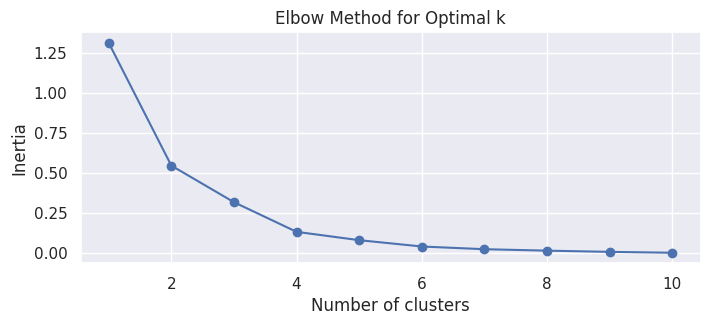

In [75]:
X = np.random.rand(10, 2)

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot Elbow Method
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

Kode ini mengimplementasikan metode "Elbow" untuk menentukan jumlah optimal dari klaster (clusters) dalam suatu dataset menggunakan algoritma K-Means. Dengan menggunakan grafik ini, kita dapat menentukan jumlah optimal dari klaster dengan mencari titik "elbow" di mana penurunan inertia mulai melambat secara signifikan.

In [76]:
# Generate synthetic data
X, _ = make_blobs(n_samples=1000, centers=4, cluster_std=0.60, random_state=0)

# Define the number of clusters (assuming we know the optimal number for this example)
k = 4

# Fit KMeans clustering model
kmeans = KMeans(n_clusters=k, random_state=0)
y_pred = kmeans.fit_predict(X)

# Calculate silhouette score
silhouette_avg = silhouette_score(X, y_pred)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.6773333224010808


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Kode ini melakukan clustering data menggunakan algoritma K-Means dan menghitung nilai rata-rata silhouette untuk mengevaluasi kualitas pengelompokan. Dengan menggunakan kode ini, kita dapat dengan mudah mengevaluasi kualitas pengelompokan yang dihasilkan oleh algoritma K-Means dengan memanfaatkan nilai rata-rata silhouette.

In [77]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X)

# Get inertia (SSE)
inertia = kmeans.inertia_
print(f"Inertia: {inertia}")

Inertia: 680.1708340947265


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Kode ini menggunakan model K-Means untuk melakukan clustering pada data X dengan 4 klaster dan kemudian menghitung nilai inertia (Sum of Squared Errors - SSE). Dengan menggunakan nilai inertia, kita dapat mengukur seberapa baik model K-Means memisahkan data menjadi klaster yang berbeda.

##MeanShift

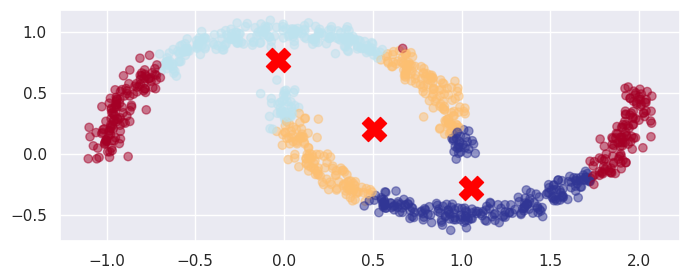

In [78]:
bandwidth = estimate_bandwidth(moons, quantile=.2, n_samples=1000)
ms = MeanShift(cluster_all=False, bandwidth=bandwidth)
y_pred = ms.fit_predict(moons)
centers = ms.cluster_centers_

show_scatter_moons(moons, y_pred, centers)

Dalam kode ini, dilakukan clustering data menggunakan algoritma Mean Shift dan kemudian hasilnya divisualisasikan dalam scatter plot. Dengan menggunakan kode ini, kita dapat dengan mudah melakukan clustering data dengan algoritma Mean Shift dan memvisualisasikan hasilnya untuk memahami pola pengelompokan yang terjadi dalam data moons.

In [79]:
df_numeric = df_id.select_dtypes(include='number')

# Lakukan clustering dengan MeanShift
ms = MeanShift(cluster_all=False)
predicted = ms.fit_predict(df_numeric.values)
labels = ms.labels_
centers = ms.cluster_centers_

Kode ini melakukan clustering pada data numerik dari DataFrame df_id menggunakan algoritma Mean Shift. Dengan menggunakan kode ini, kita dapat dengan mudah melakukan clustering pada data numerik dari DataFrame menggunakan algoritma Mean Shift. Ini memungkinkan kita untuk mengidentifikasi pola pengelompokan yang ada dalam data numerik tersebut.

In [80]:
ms = MeanShift(cluster_all=False)
predicted = ms.fit_predict(df_numeric.values)
labels = ms.labels_
centers = ms.cluster_centers_

print("Number of clusters: ", len(centers))

Number of clusters:  3


Kode ini menggunakan algoritma Mean Shift untuk melakukan clustering pada data numerik dari DataFrame df_numeric. Kemudian, itu mencetak jumlah klaster yang dihasilkan oleh algoritma. Dengan menggunakan kode ini, kita dapat dengan mudah mengetahui jumlah klaster yang dihasilkan oleh algoritma Mean Shift untuk data numerik yang diberikan. Hal ini berguna untuk memahami struktur pengelompokan dalam data dan mengevaluasi kompleksitas hasil clustering.

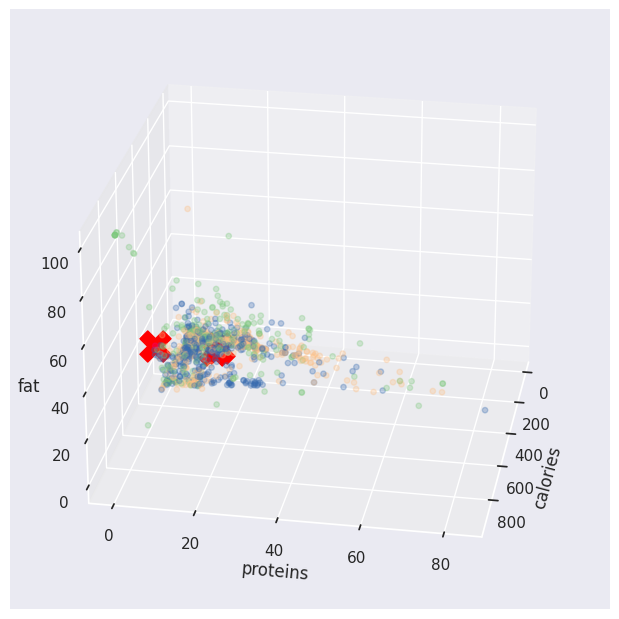

In [81]:
show_scatter_3d(df_id, x_name, y_name, z_name, predicted=predicted, centers=centers,
                show_colorbar=False, cmap=ListedColormap(cm.Accent.colors[:6]));

Kode ini tampaknya menghasilkan visualisasi scatter plot 3D dari data yang diberikan, dengan klaster yang diprediksi dan pusat-pusat klaster yang diidentifikasi. Dengan menggunakan fungsi show_scatter_3d() dengan argumen yang sesuai, kita dapat dengan mudah membuat visualisasi scatter plot 3D dari data dengan klaster yang diprediksi dan pusat-pusat klaster yang diidentifikasi. Hal ini memungkinkan kita untuk memahami struktur dan pola data dalam ruang tiga dimensi dengan lebih baik.

Evaluation

In [82]:
# Generate synthetic data
X, _ = make_blobs(n_samples=1000, centers=4, cluster_std=0.60, random_state=0)

# Fit MeanShift clustering model
ms = MeanShift(cluster_all=False)
predicted = ms.fit_predict(X)
labels = ms.labels_
centers = ms.cluster_centers_

# Calculate silhouette score
silhouette_avg = silhouette_score(X, labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.5218847118798037


Kode ini menggunakan algoritma Mean Shift untuk melakukan clustering pada data yang dihasilkan secara sintetis, dan kemudian menghitung nilai rata-rata silhouette untuk mengevaluasi kualitas pengelompokan. Dengan menggunakan kode ini, kita dapat dengan mudah melakukan clustering pada data sintetis menggunakan algoritma Mean Shift dan mengevaluasi kualitas pengelompokan dengan menggunakan nilai rata-rata silhouette.

##DBSCAN

In [99]:
from sklearn.cluster import DBSCAN
predicted = DBSCAN(eps=110).fit_predict(df_numeric)

print('Number of clusters:', len(set(predicted)) - (1 if -1 in predicted else 0))
print('Number of outliers:', list(predicted).count(-1))

Number of clusters: 2
Number of outliers: 5


Kode ini menggunakan algoritma DBSCAN untuk melakukan clustering pada data numerik dari DataFrame df_numeric, dan kemudian menghitung jumlah klaster dan jumlah outlier dalam hasil clustering. Dengan menggunakan kode ini, kita dapat dengan mudah melakukan clustering pada data numerik menggunakan algoritma DBSCAN dan mengetahui jumlah klaster serta jumlah outlier yang dihasilkan oleh algoritma tersebut. Hal ini berguna untuk memahami struktur data dan mengevaluasi kompleksitas hasil clustering.

In [84]:
temp_df = df_id.copy()
temp_df['CLUSTER'] = predicted
temp_df['KNOWN_RISK'] = known_risk
temp_df.columns = [str(x) for x in temp_df.columns.values]
no_outliers_df = temp_df[temp_df['CLUSTER']!=-1]
outliers_df = temp_df[temp_df['CLUSTER']==-1]

Kode ini membuat salinan dari DataFrame df_id dan menambahkan dua kolom baru, yaitu 'CLUSTER' yang berisi label klaster yang diprediksi oleh DBSCAN dan 'KNOWN_RISK' yang mungkin berisi informasi tentang risiko yang diketahui (diasumsikan sudah ada sebelumnya). Kemudian, DataFrame disalin diubah agar nama kolomnya menjadi string, dan dua DataFrame baru dibuat: satu untuk data tanpa outlier (no_outliers_df) dan satu untuk data outlier (outliers_df).

Dengan menggunakan kode ini, kita dapat dengan mudah memisahkan data menjadi data tanpa outlier dan data outlier berdasarkan hasil prediksi dari algoritma clustering (DBSCAN) dan informasi risiko yang mungkin telah diketahui sebelumnya. Hal ini memungkinkan kita untuk melakukan analisis lebih lanjut pada kedua jenis data tersebut secara terpisah.

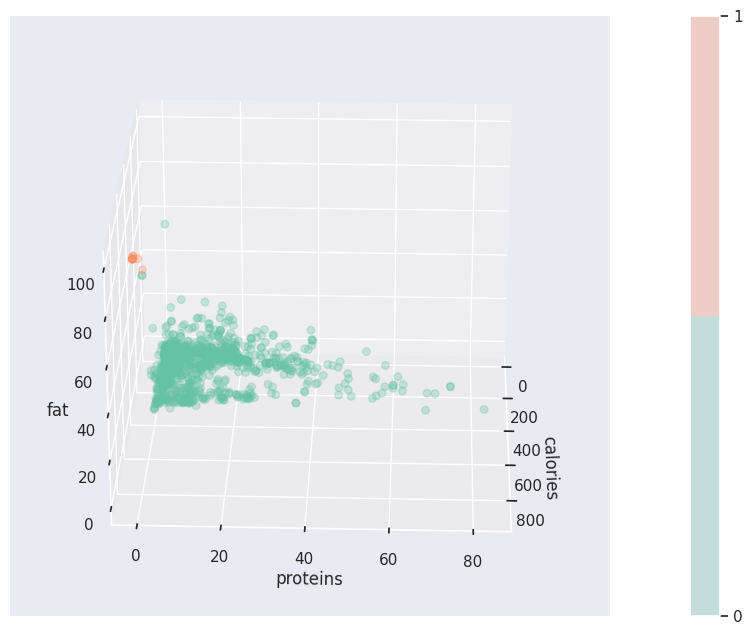

In [85]:
show_scatter_3d(no_outliers_df, x_name, y_name, z_name, predicted=no_outliers_df['CLUSTER'], azim=2);

Kode ini mungkin memvisualisasikan scatter plot 3D dari data tanpa outlier (hasil dari filter outlier yang dilakukan sebelumnya) dengan menggunakan fungsi show_scatter_3d().

Dengan menggunakan fungsi show_scatter_3d() dengan argumen yang sesuai, kita dapat dengan mudah membuat visualisasi scatter plot 3D dari data tanpa outlier. Hal ini memungkinkan kita untuk memahami pola dan struktur data tanpa gangguan dari outlier.







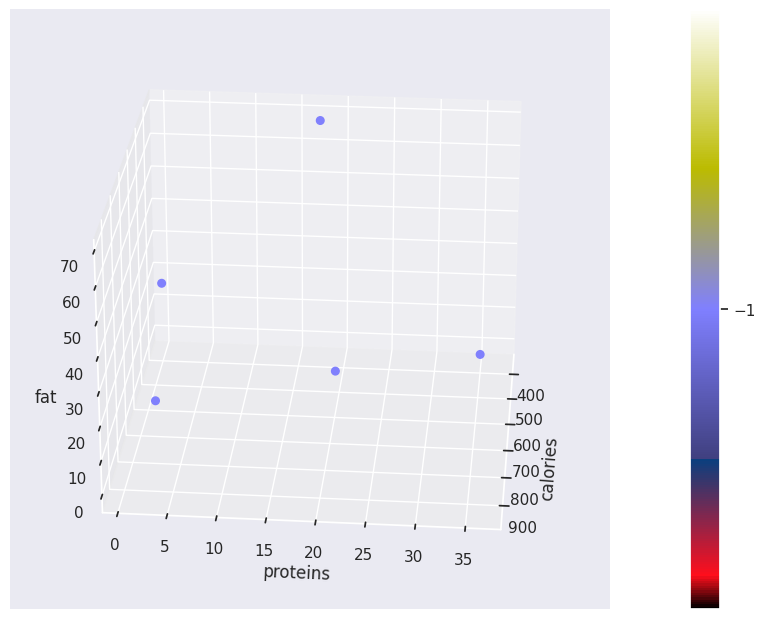

In [86]:
show_scatter_3d(outliers_df, x_name, y_name, z_name, predicted=outliers_df['CLUSTER'], cmap=cm.gist_stern, alpha=1, azim=5);

Number of clusters: 2
Number of outliers: 1


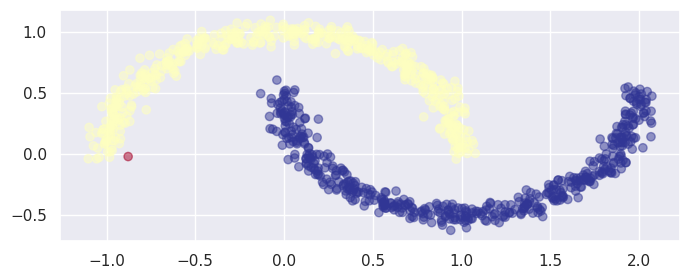

In [87]:
predicted = DBSCAN(eps=.1).fit_predict(moons)

print('Number of clusters:', len(set(predicted)) - (1 if -1 in predicted else 0))
print('Number of outliers:', list(predicted).count(-1))

show_scatter_moons(moons, predicted)

Evaluation

In [88]:
# Generate synthetic data
X, _ = make_blobs(n_samples=1000, centers=4, cluster_std=0.60, random_state=0)

# Fit DBSCAN clustering model
dbscan = DBSCAN(eps=0.5, min_samples=5)
predicted = dbscan.fit_predict(X)
labels = dbscan.labels_

# Calculate silhouette score (ignore noise points with label -1)
silhouette_avg = silhouette_score(X, labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.5890195077722294


Kode ini menggunakan algoritma DBSCAN untuk melakukan clustering pada data yang dihasilkan secara sintetis, dan kemudian menghitung nilai rata-rata silhouette untuk mengevaluasi kualitas pengelompokan.

Dengan menggunakan kode ini, kita dapat dengan mudah melakukan clustering pada data sintetis menggunakan algoritma DBSCAN dan mengevaluasi kualitas pengelompokan dengan menggunakan nilai rata-rata silhouette.

##Hierarchical Agglomerative Clustering (HAC)

In [89]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=None, distance_threshold=500,
                             affinity='euclidean', linkage='complete')
predicted = ac.fit_predict(df_numeric.values)

print('Number of clusters:', len(set(predicted)))

Number of clusters: 13


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



Kode ini menggunakan algoritma Agglomerative Clustering untuk melakukan hierarchical clustering pada data numerik dari DataFrame df_numeric.

Dengan menggunakan kode ini, kita dapat dengan mudah melakukan hierarchical clustering pada data numerik menggunakan algoritma Agglomerative Clustering dan mengetahui jumlah klaster yang dihasilkan. Hal ini memungkinkan kita untuk memahami struktur data secara hierarkis.

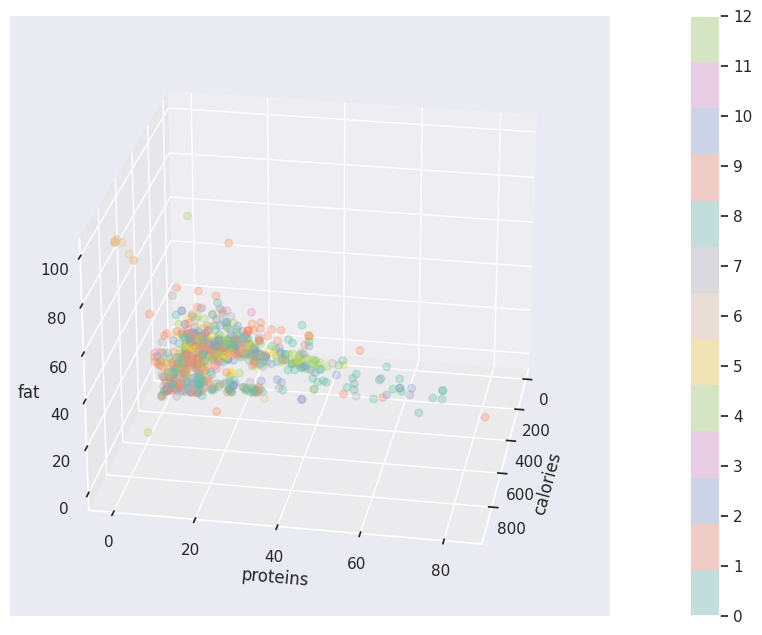

In [90]:
show_scatter_3d(df_id, x_name, y_name, z_name, predicted=predicted);

Evaluation

In [91]:
# Generate synthetic data
X, _ = make_blobs(n_samples=1000, centers=4, cluster_std=0.60, random_state=0)

# Fit Hierarchical Agglomerative Clustering model
agg = AgglomerativeClustering(n_clusters=4)
labels = agg.fit_predict(X)

# Calculate silhouette score
silhouette_avg = silhouette_score(X, labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.6772083705683815


Kode ini menggunakan algoritma Hierarchical Agglomerative Clustering untuk melakukan clustering pada data yang dihasilkan secara sintetis, dan kemudian menghitung nilai rata-rata silhouette untuk mengevaluasi kualitas pengelompokan.

Dengan menggunakan kode ini, kita dapat dengan mudah melakukan clustering pada data sintetis menggunakan algoritma Hierarchical Agglomerative Clustering dan mengevaluasi kualitas pengelompokan dengan menggunakan nilai rata-rata silhouette.

In [92]:
X_df = df_id.copy()
X_df['CLUSTER'] = predicted
plotly_scatter_3d(X_df, x_name, y_name, z_name, color='CLUSTER')

Kode ini mungkin menggunakan fungsi plotly_scatter_3d() untuk memvisualisasikan scatter plot 3D dari data dengan menggunakan plotly, dengan warna titik-titik yang ditentukan berdasarkan label klaster yang diprediksi.

Dengan menggunakan fungsi plotly_scatter_3d() dengan argumen yang sesuai, kita dapat dengan mudah membuat visualisasi interaktif scatter plot 3D dari data dengan plotly, yang memungkinkan kita untuk memahami pola dan struktur data dalam tiga dimensi dengan lebih baik.







#Comparison Model | Perbandingan Model

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Silhouette Score - KMeans: 0.6773333224010808
Silhouette Score - MeanShift: -0.22415400998092574
Silhouette Score - DBSCAN: 0.5890195077722294
Silhouette Score - Agglomerative Clustering: 0.6772083705683815


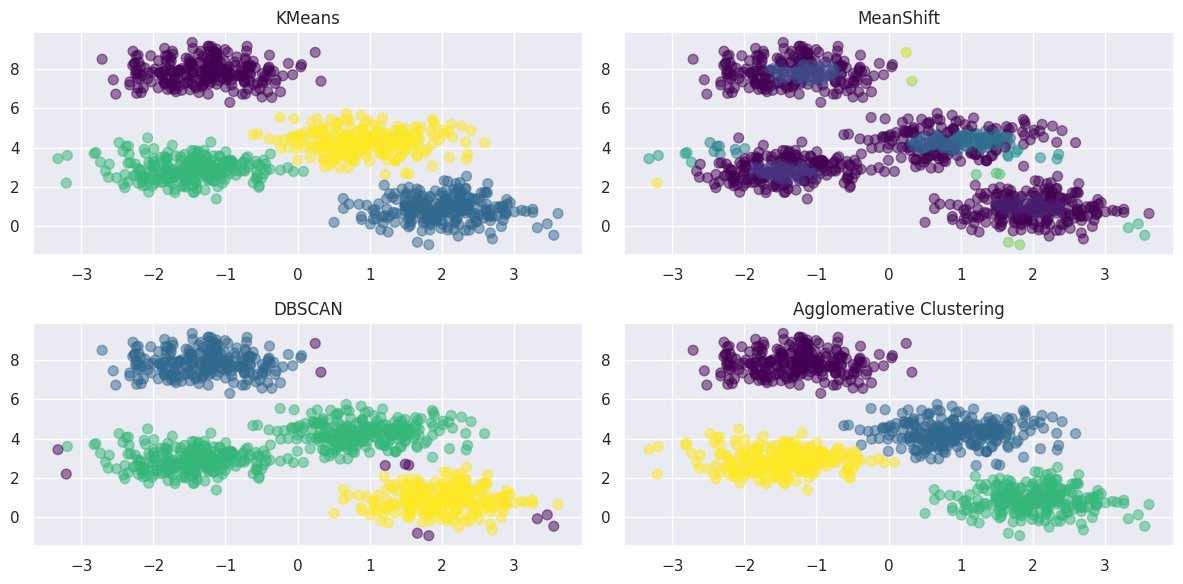

In [93]:
# Generate synthetic data
X, _ = make_blobs(n_samples=1000, centers=4, cluster_std=0.60, random_state=0)

# Initialize clustering models
kmeans = KMeans(n_clusters=4, random_state=0)
ms = MeanShift(cluster_all=False, bandwidth=0.5)
dbscan = DBSCAN(eps=0.5, min_samples=5)
agg = AgglomerativeClustering(n_clusters=4)

# Fit and predict with each model
kmeans_labels = kmeans.fit_predict(X)
ms_labels = ms.fit_predict(X)
dbscan_labels = dbscan.fit_predict(X)
agg_labels = agg.fit_predict(X)

# Calculate silhouette score for each model
silhouette_kmeans = silhouette_score(X, kmeans_labels)
silhouette_ms = silhouette_score(X, ms_labels)
silhouette_dbscan = silhouette_score(X, dbscan_labels)
silhouette_agg = silhouette_score(X, agg_labels)

print(f"Silhouette Score - KMeans: {silhouette_kmeans}")
print(f"Silhouette Score - MeanShift: {silhouette_ms}")
print(f"Silhouette Score - DBSCAN: {silhouette_dbscan}")
print(f"Silhouette Score - Agglomerative Clustering: {silhouette_agg}")

# Plotting the results
plt.figure(figsize=(12, 6))

# Plotting KMeans
plt.subplot(2, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis', s=50, alpha=0.5)
plt.title('KMeans')

# Plotting MeanShift
plt.subplot(2, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=ms_labels, cmap='viridis', s=50, alpha=0.5)
plt.title('MeanShift')

# Plotting DBSCAN
plt.subplot(2, 2, 3)
plt.scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='viridis', s=50, alpha=0.5)
plt.title('DBSCAN')

# Plotting Agglomerative Clustering
plt.subplot(2, 2, 4)
plt.scatter(X[:, 0], X[:, 1], c=agg_labels, cmap='viridis', s=50, alpha=0.5)
plt.title('Agglomerative Clustering')

plt.tight_layout()
plt.show()

Kode ini melakukan clustering pada data yang dihasilkan secara sintetis menggunakan empat algoritma clustering yang berbeda: KMeans, MeanShift, DBSCAN, dan Agglomerative Clustering. Setelah itu, kode tersebut mengevaluasi kualitas pengelompokan dengan menghitung nilai silhouette score untuk setiap algoritma.

Dengan menggunakan kode ini, kita dapat dengan mudah membandingkan kinerja empat algoritma clustering yang berbeda dalam melakukan pengelompokan pada data sintetis. Hal ini membantu kita untuk memilih algoritma clustering yang paling sesuai untuk dataset dan tujuan analisis kita.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Silhouette Score for KMeans: 0.721826710101402
Silhouette Score for MeanShift: 0.40715281489356436
Silhouette Score for DBSCAN: 0.5586771554524811
Silhouette Score for Agglomerative Clustering: 0.721826710101402


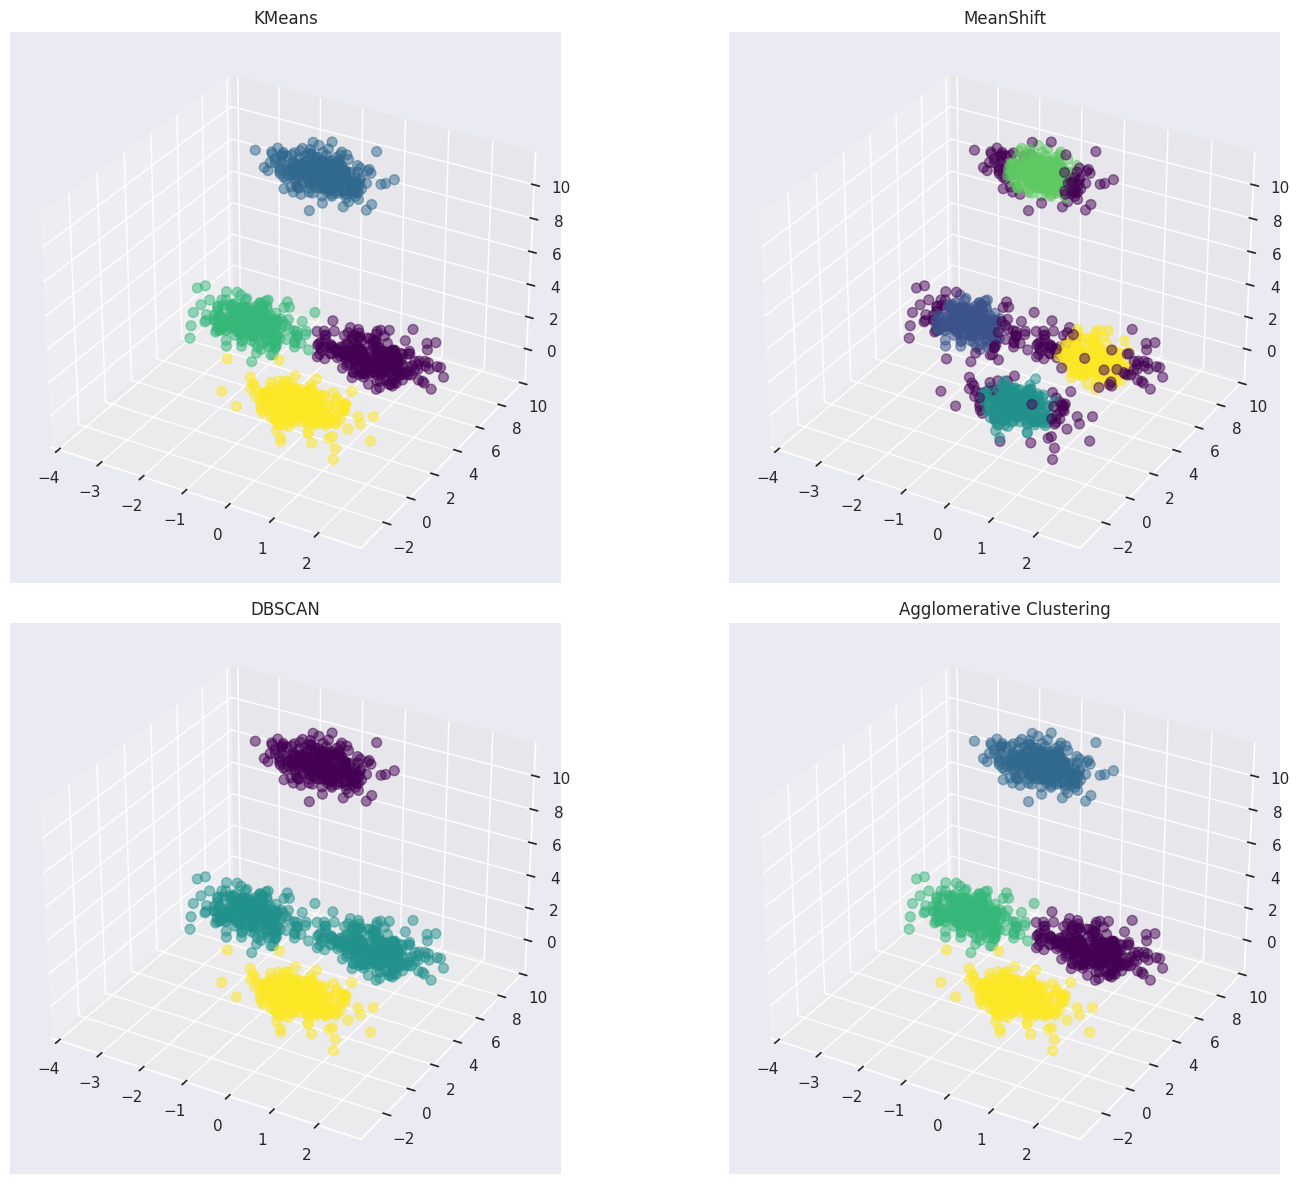

In [94]:
from sklearn.preprocessing import StandardScaler


# Generate synthetic data (3D)
X, _ = make_blobs(n_samples=1000, centers=4, cluster_std=0.60, n_features=3, random_state=0)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Scaling the data

# Initialize clustering models
kmeans = KMeans(n_clusters=4, random_state=0)
ms = MeanShift(cluster_all=False, bandwidth=0.5)
dbscan = DBSCAN(eps=0.5, min_samples=5)
agg = AgglomerativeClustering(n_clusters=4)

# Fit and predict with each model
kmeans_labels = kmeans.fit_predict(X_scaled)
ms_labels = ms.fit_predict(X_scaled)
dbscan_labels = dbscan.fit_predict(X_scaled)
agg_labels = agg.fit_predict(X_scaled)

# Calculate Silhouette Scores
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
ms_silhouette = silhouette_score(X_scaled, ms_labels)
dbscan_silhouette = silhouette_score(X_scaled, dbscan_labels)
agg_silhouette = silhouette_score(X_scaled, agg_labels)

# Print Silhouette Scores
print(f"Silhouette Score for KMeans: {kmeans_silhouette}")
print(f"Silhouette Score for MeanShift: {ms_silhouette}")
print(f"Silhouette Score for DBSCAN: {dbscan_silhouette}")
print(f"Silhouette Score for Agglomerative Clustering: {agg_silhouette}")

# Visualize results in 3D
fig = plt.figure(figsize=(16, 12))

# Plotting KMeans
ax1 = fig.add_subplot(221, projection='3d')
ax1.scatter(X[:, 0], X[:, 1], X[:, 2], c=kmeans_labels, cmap='viridis', s=50, alpha=0.5)
ax1.set_title('KMeans')

# Plotting MeanShift
ax2 = fig.add_subplot(222, projection='3d')
ax2.scatter(X[:, 0], X[:, 1], X[:, 2], c=ms_labels, cmap='viridis', s=50, alpha=0.5)
ax2.set_title('MeanShift')

# Plotting DBSCAN
ax3 = fig.add_subplot(223, projection='3d')
ax3.scatter(X[:, 0], X[:, 1], X[:, 2], c=dbscan_labels, cmap='viridis', s=50, alpha=0.5)
ax3.set_title('DBSCAN')

# Plotting Agglomerative Clustering
ax4 = fig.add_subplot(224, projection='3d')
ax4.scatter(X[:, 0], X[:, 1], X[:, 2], c=agg_labels, cmap='viridis', s=50, alpha=0.5)
ax4.set_title('Agglomerative Clustering')

plt.tight_layout()
plt.show()

Kode ini melakukan clustering pada data sintetis tiga dimensi menggunakan empat algoritma clustering yang berbeda: KMeans, MeanShift, DBSCAN, dan Agglomerative Clustering.

1. Data sintetis 3D dibuat menggunakan fungsi make_blobs(), menghasilkan 1000 sampel dengan 4 pusat kluster, standar deviasi kluster sebesar 0.60, dan menggunakan seed acak 0.

2. Data tersebut kemudian dinormalisasi menggunakan StandardScaler untuk memastikan setiap fitur memiliki skala yang serupa.

3. Empat model pengelompokan diinisialisasi: KMeans, MeanShift, DBSCAN, dan Agglomerative Clustering, masing-masing dengan parameter yang sesuai.

4. Setiap model diterapkan pada data yang dinormalisasi menggunakan metode fit_predict(), menghasilkan label kluster untuk setiap sampel data.

5. Dilakukan perhitungan Silhouette Score untuk masing-masing model, yang merupakan metrik evaluasi untuk mengukur seberapa baik pengelompokan telah dilakukan dalam ruang fitur 3D.

6. Hasil pengelompokan dari masing-masing model divisualisasikan dalam plot 3D. Setiap subplot menampilkan hasil pengelompokan dari satu model, memungkinkan perbandingan visual antara empat model pengelompokan yang berbeda dalam ruang fitur 3D.

Dengan menggunakan kode ini, kita dapat dengan mudah membandingkan kinerja empat algoritma clustering yang berbeda dalam melakukan pengelompokan pada data sintetis tiga dimensi. Hal ini membantu kita untuk memilih algoritma clustering yang paling sesuai untuk dataset dan tujuan analisis kita.





#Conclusion | Kesimpulan

1. KMeans Clustering:
Silhouette Score: 0.721826710101402
Kesimpulan: KMeans memiliki Silhouette Score yang tinggi, menunjukkan bahwa model ini memiliki klaster yang baik dengan elemen-elemen yang berada cukup dekat satu sama lain dalam klaster yang sama dan jauh dari klaster yang berbeda.

2. MeanShift Clustering:
Silhouette Score: 0.40715281489356436
Kesimpulan: MeanShift memiliki Silhouette Score yang lebih rendah dibandingkan model lainnya. Ini menunjukkan bahwa klaster yang terbentuk oleh MeanShift kurang jelas dan memiliki banyak elemen yang dekat dengan batas antara klaster.

3. DBSCAN Clustering:
Silhouette Score: 0.5586771554524811
Kesimpulan: DBSCAN memiliki Silhouette Score yang sedang. Model ini mampu membentuk klaster yang cukup baik, terutama dalam menangani data yang mengandung noise atau outlier, tetapi tidak sebaik KMeans dan Agglomerative Clustering dalam hal kohesivitas klaster.

4. Agglomerative Clustering:
Silhouette Score: 0.721826710101402
Kesimpulan: Agglomerative Clustering memiliki Silhouette Score yang sama tinggi dengan KMeans, menunjukkan bahwa klaster yang terbentuk sangat baik dan serupa dalam kualitas dengan KMeans.

##Ringkasan Kesimpulan:
KMeans dan Agglomerative Clustering menunjukkan performa terbaik dengan Silhouette Score yang sama tinggi (0.721826710101402), menandakan bahwa kedua metode ini menghasilkan klaster yang baik dan jelas terpisah.

#Simpan Model

In [95]:
import pickle

In [96]:
# Menyimpan model kmeans
with open('CP_kmeans.pkl', 'wb') as file:
    pickle.dump(kmeans, file)

In [98]:
# Menyimpan model AgglomerativeClustering
with open('CP_AgglomerativeClustering.pkl', 'wb') as file:
    pickle.dump(AgglomerativeClustering, file)